In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats# 统计模块
import scipy

from datetime import datetime
import calendar 

import statsmodels.formula.api as amf# OLS回归
import statsmodels.api as sm# 统计模型

# import pyreader 读取R数据文件

from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 高清显示图像

pd.set_option('display.max_columns', None) # 显示所有列

In [3]:
data = pd.read_csv('D:/python_class_2025/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [4]:
data_new = data['1993-01':'2022-07'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1993-01-04,780.3900,784.1300,816.6400,777.1600,814.0400,0.043119
1993-01-05,814.0400,851.0200,859.1900,817.2100,858.7200,0.054887
1993-01-06,858.7200,881.0000,883.4200,843.1600,847.4400,-0.013136
1993-01-07,847.4400,855.8000,868.9700,849.5300,868.9700,0.025406
1993-01-08,868.9700,882.5700,893.8600,878.3300,889.4700,0.023591
...,...,...,...,...,...,...
2022-07-25,3269.9700,3269.7100,3273.1800,3243.0300,3250.3900,-0.005988
2022-07-26,3250.3900,3254.1900,3282.4100,3246.0400,3277.4400,0.008322
2022-07-27,3277.4400,3271.7800,3282.5700,3265.7300,3275.7600,-0.000513


In [5]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Month_data

,Ret
Day,
1993-01-31,0.535745
1993-02-28,0.117983
1993-03-31,-0.308961
1993-04-30,0.467508
1993-05-31,-0.311529
...,...
2022-03-31,-0.060685
2022-04-30,-0.063077
2022-05-31,0.045739


In [6]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Quarter_data

,Ret
Day,
1993-03-31,0.186471
1993-06-30,0.087633
1993-09-30,-0.115962
1993-12-31,-0.063430
1994-03-31,-0.155121
...,...
2021-09-30,-0.006413
2021-12-31,0.020069
2022-03-31,-0.106484


In [7]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Year_data

,Ret
Day,
1993-12-31,0.068440
1994-12-31,-0.222991
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180


In [8]:
# 为月度收益创建辅助字段，便于深入分析
Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')
Month_data['Decade'] = (Month_data['Year'] // 10) * 10
Month_data['Rolling_ann_return'] = (1 + Month_data['Ret']).rolling(window=12, min_periods=12).apply(lambda x: np.prod(x) - 1, raw=True)
Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(window=12, min_periods=12).std() * np.sqrt(12)
Month_data

,Ret,Year,Month,Month_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,
1993-01-31,0.535745,1993,1,Jan,1990,NaN,NaN
1993-02-28,0.117983,1993,2,Feb,1990,NaN,NaN
1993-03-31,-0.308961,1993,3,Mar,1990,NaN,NaN
1993-04-30,0.467508,1993,4,Apr,1990,NaN,NaN
1993-05-31,-0.311529,1993,5,May,1990,NaN,NaN
...,...,...,...,...,...,...,...
2022-03-31,-0.060685,2022,3,Mar,2020,-0.055118,0.140189
2022-04-30,-0.063077,2022,4,Apr,2020,-0.115990,0.151846
2022-05-31,0.045739,2022,5,May,2020,-0.118670,0.150542


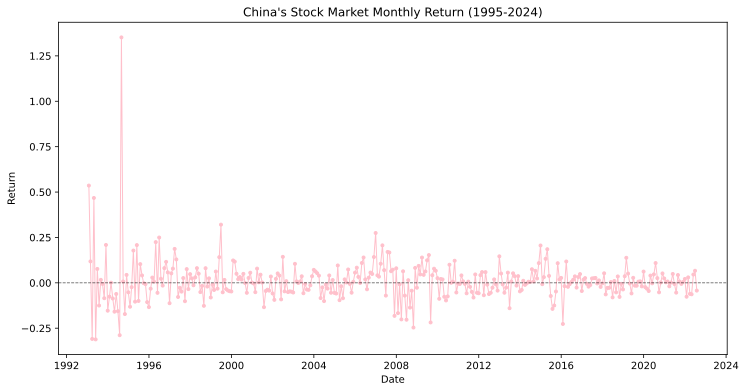

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(
    'Ret',
    '.-',
    color='pink',
    label='Monthly Return',
    linewidth=1,
    data=Month_data
)
ax.set_title("China's Stock Market Monthly Return (1995-2024)")
ax.set_xlabel('Date') 
plt.ylabel('Return')

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y') # 只显示年份
ax.xaxis.set_major_formatter(date_format) # 设置x轴的日期格式

# 添加零线
ax.axhline(0, color='black', linewidth=0.8, linestyle='--',alpha=0.7)

fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')

plt.show()
# 添加；会使图片干净

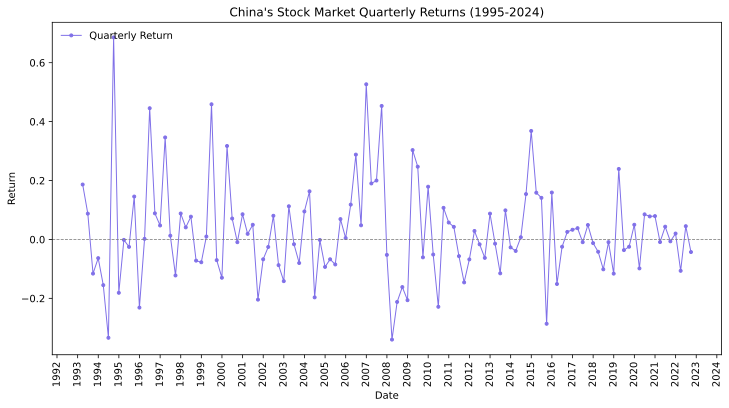

In [19]:
# 画图
fig, ax = plt.subplots(figsize=(12,6)) # 图片比例
ax.plot(
    Quarter_data.index,  # x轴数据
    Quarter_data['Ret'],  # y轴数据
    '.-',  # 线的类型
    color = "#8070E8",  # 线的颜色 RGB
    label = 'Quarterly Return',  # 更改为季度收益率标签
    linewidth = 1,  # 线的粗细
)
ax.set_title("China's Stock Market Quarterly Returns (1995-2024)") # 更精确的标题
ax.set_xlabel('Date') # 更改x轴名称
plt.ylabel('Return') # y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)

fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();

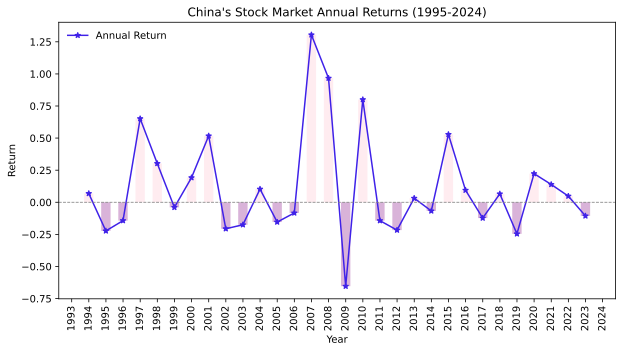

In [24]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    Year_data.index,  # x轴数据
    Year_data['Ret'],  # y轴数据
    '*-',  # 线的类型，使用圆点标记每年的数据点
    color = "#3F21E8",  # 线的颜色，使用橙色以区分月度和季度图
    label = 'Annual Return',  # 更改标签为年度收益
    linewidth = 1.5,  # 线的粗细，略微加粗以突出年度数据
)
ax.set_title("China's Stock Market Annual Returns (1995-2024)") # 更精确的标题
ax.set_xlabel('Year') # 更改x轴名称
plt.ylabel('Return') # y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 为正负收益添加不同颜色的填充
for i, year in enumerate(Year_data.index):
    if Year_data['Ret'].iloc[i] >= 0:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='pink')
    else:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='purple')

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)

# 保存图片到images文件夹
fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();

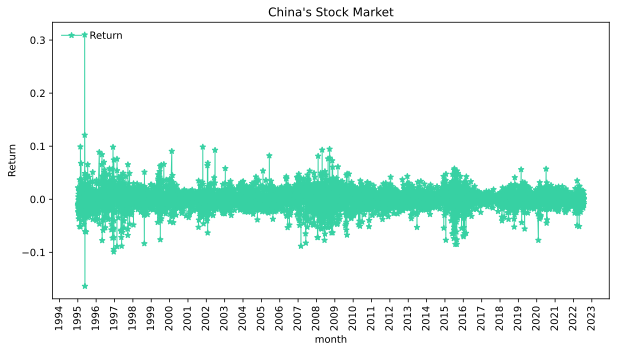

In [26]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    'Raw_return',  # 要画图的变量名
    '*-',  # 线的类型
    color = "#37D1A3",  # 线的颜色 RGB
    label = 'Return',  # 这个是线的类别，主要是在多条线画图的时候，起到区别的作用，单条线这个没有影响
    linewidth = 1,  # 线的粗细
    data = data_new['1995-01-01':'2024-07-31'])  # 画图的数据
ax.set_title("China's Stock Market") # 画图的标题
ax.set_xlabel('month') # 画图的x轴名称
plt.ylabel('Return') # 画图的y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# # 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator())

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)
fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();

累计收益与最大回撤

In [28]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1

FileNotFoundError: [Errno 2] No such file or directory: 'images/Cumulative_return.pdf'

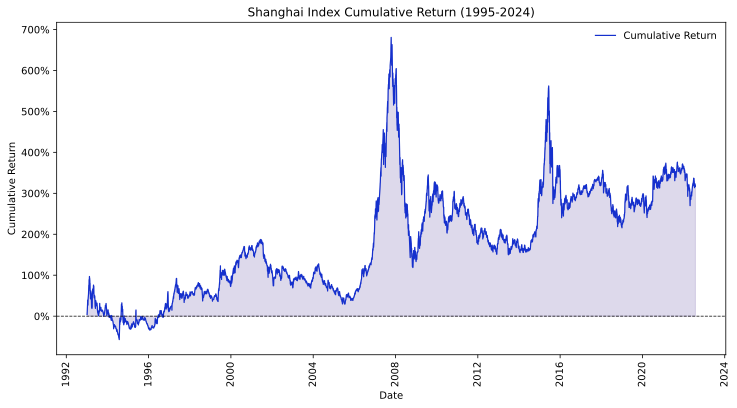

In [53]:
# Cumulative return of Shanghai Index (base=0)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_new.index, data_new['Cum_return'], color="#1530CD", linewidth=1.2, label='Cumulative Return')
ax.fill_between(data_new.index, 0, data_new['Cum_return'], color="#1F037D", alpha=0.15)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Shanghai Index Cumulative Return (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(frameon=False) # 图例不显示边框
fig.savefig('images/Cumulative_return.pdf', bbox_inches='tight')
plt.show();

In [30]:
data_new['Peak']=data_new['Cum_return'].cummax() # 计算累计收益的历史最高值
data_new['Drawdown']=data_new['Cum_return']-data_new['Peak']

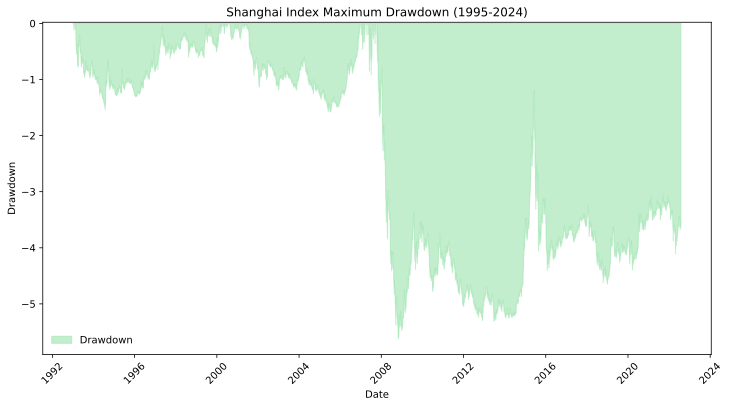

In [37]:
# 最大回撤曲线，关注下行风险
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(data_new.index, data_new['Drawdown'], 0, color="#9BE2AE", alpha=0.6, label='Drawdown')
ax.set_title('Shanghai Index Maximum Drawdown (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown')
ax.set_ylim(data_new['Drawdown'].min() * 1.05, 0.02)
plt.xticks(rotation=45)
plt.legend(frameon=False)
fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();

月收益率的分布情况与季节效应


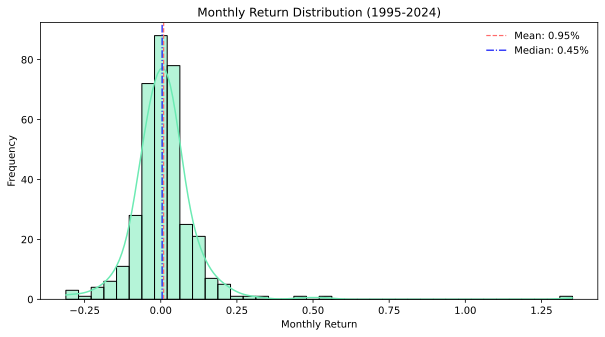

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(Month_data['Ret'].dropna(), bins=40, kde=True, color="#6CEAB3", ax=ax)
mean_return = Month_data['Ret'].mean()
median_return = Month_data['Ret'].median()
ax.axvline(mean_return, color='#FF6A6A', linestyle='--', linewidth=1.2, label=f"Mean: {mean_return:.2%}")
ax.axvline(median_return, color="#0810F7", linestyle='-.', linewidth=1.2, label=f"Median: {median_return:.2%}")
ax.set_title("Monthly Return Distribution (1995-2024)")
ax.set_xlabel('Monthly Return')
ax.set_ylabel('Frequency')
plt.legend(frameon=False)

fig.savefig(r"D:/python_class_2025/python_class_assignment",
            bbox_inches='tight')
plt.show()

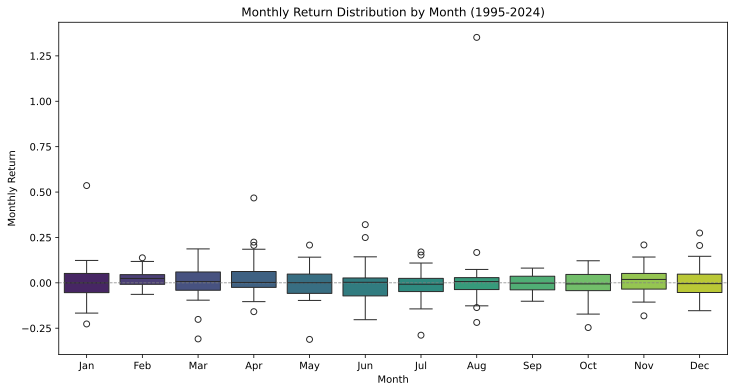

In [42]:
# Boxplot: Monthly return distribution by month
month_order = list(calendar.month_abbr[1:]) 
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=Month_data.dropna(subset=['Ret']), x='Month_name', y='Ret', hue='Month_name', order=month_order, palette='viridis', ax=ax, legend=False)  # hue 表示每个箱线图根据月份着色，进一步区分不同月份。palette='Blues' 选择蓝色系配色方案，使不同月份的箱线图颜色有层次变化。
ax.set_title('Monthly Return Distribution by Month (1995-2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Return')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Add reference line at zero
plt.xticks(rotation=0)
fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();

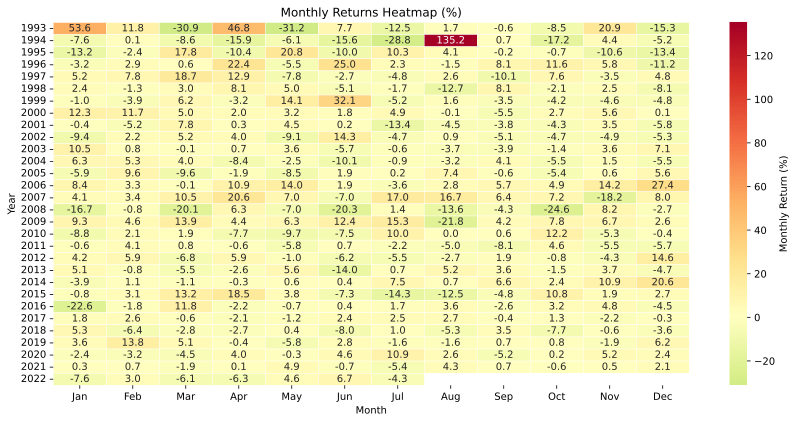

In [44]:
# Create a year-month pivot table for the heatmap
heatmap_data = Month_data.pivot_table(values='Ret', index='Year', columns='Month', aggfunc='first').sort_index()
heatmap_data.columns = [calendar.month_abbr[m] for m in heatmap_data.columns]

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data * 100, 
            cmap='RdYlGn_r',  # Red (negative) to Green (positive) colormap
            center=0,       # Center the colormap at zero
            linewidths=0.4, 
            linecolor='white',
            cbar_kws={'label': 'Monthly Return (%)'},
            annot=True,     # Show values in cells
            fmt='.1f',      # Format as 1 decimal place
            ax=ax)

ax.set_title('Monthly Returns Heatmap (%)')
ax.set_xlabel('Month')
ax.set_ylabel('Year')

plt.tight_layout()
fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();


收益率的自相关图

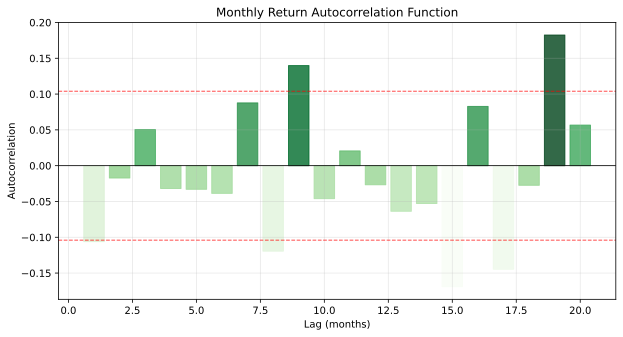

In [46]:
from matplotlib import cm
from statsmodels.tsa.stattools import acf

# 计算自相关函数
lags = 20
autocorr = acf(Month_data['Ret'].dropna(), nlags=lags, fft=True)
autocorr_no_zero = autocorr[1:]

fig, ax = plt.subplots(figsize=(10, 5))

norm = (autocorr_no_zero - autocorr_no_zero.min()) / (autocorr_no_zero.max() - autocorr_no_zero.min())
colors = cm.Greens(norm)  

# 绘制柱子，每个 bar 一个颜色
for i, val in enumerate(autocorr_no_zero):
    ax.bar(i+1, val, color=colors[i], edgecolor=colors[i], alpha=0.8)

# 置信区间
conf_level = 1.96/np.sqrt(len(Month_data['Ret'].dropna()))
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y= conf_level, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-conf_level, color='red', linestyle='--', linewidth=1, alpha=0.7)

ax.set_title('Monthly Return Autocorrelation Function')
ax.set_xlabel('Lag (months)')
ax.set_ylabel('Autocorrelation')
ax.grid(True, alpha=0.3)

fig.savefig(r"D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# 日数据的自相关函数
lags = 20
daily_autocorr = acf(data_new['Raw_return'].dropna(), nlags=lags, fft=True)

# 删除 lag=0 的点
daily_autocorr_no_zero = daily_autocorr[1:]

fig, ax = plt.subplots(figsize=(10, 5))

# 归一化到 0-1 用于渐变映射
norm = (daily_autocorr_no_zero - daily_autocorr_no_zero.min()) / \
       (daily_autocorr_no_zero.max() - daily_autocorr_no_zero.min())
colors = cm.Greens(norm)   # 绿色渐变

# 绘制柱子
for i, val in enumerate(daily_autocorr_no_zero):
    ax.bar(i+1, val, color=colors[i], edgecolor=colors[i], alpha=0.8)

# 添加置信区间线
conf_level = 1.96 / np.sqrt(len(data_new['Raw_return'].dropna()))
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y= conf_level, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-conf_level, color='red', linestyle='--', linewidth=1, alpha=0.7)

# 设置标题和坐标轴
ax.set_title('Daily Return Autocorrelation Function')
ax.set_xlabel('Lag (days)')
ax.set_ylabel('Autocorrelation')
ax.grid(True, alpha=0.3)

fig.savefig(r"D:/python_class_2025/python_class_assignment",
            bbox_inches='tight')
plt.show()

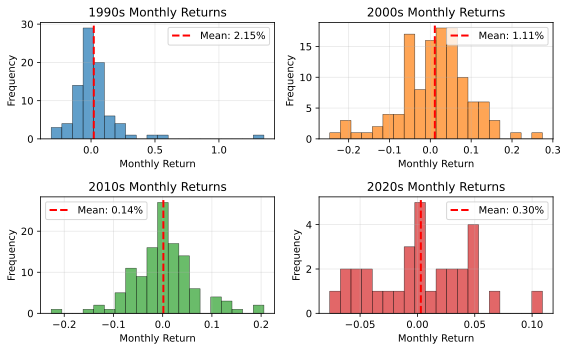

In [54]:
# 按年代分析收益率分布
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
decades = Month_data['Decade'].unique()
decades = sorted([d for d in decades if not pd.isna(d)])

for i, decade in enumerate(decades):
    row = i // 2
    col = i % 2
    decade_data = Month_data[Month_data['Decade'] == decade]['Ret'].dropna()
    
    axes[row, col].hist(decade_data, bins=20, alpha=0.7, color=f'C{i}', edgecolor='black', linewidth=0.5)
    axes[row, col].axvline(decade_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {decade_data.mean():.2%}')
    axes[row, col].set_title(f'{int(decade)}s Monthly Returns')
    axes[row, col].set_xlabel('Monthly Return')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
fig.savefig("D:/python_class_2025/python_class_assignment", bbox_inches='tight')
plt.show();